Este cuadernillo contiene todo el c√≥digo empleado para realizar la parte de nuestro TFM relativa al an√°lisis del dataset Youtube Video Trending Dataset. Incluye las siguientes secciones:

- Instalaci√≥n de subprogramas y librer√≠as
- Preprocesamiento de los datos
- Obtenci√≥n y an√°lisis de caracter√≠sticas de los datos

## Instalaci√≥n de subprogramas y librer√≠as

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import isodate #para manejar formato de duraci√≥n ISO 8601
import re #para manejar expresiones regulares
from textblob import TextBlob

## Preprocesamiento de datos

In [2]:
# PASO 1: LECTURA DEL ARCHIVO
df = pd.read_csv("csv_final_merged.csv", low_memory=False)

In [3]:
# El primer paso del preprocesado es eliminar columnas que consideramos innecesarias para el estudio. Estas son: 
# channel_id,video_dimension, channel_have_hidden_subscribers, channel_localized_title, channel_localized_description
elim_columns = ['channel_id','video_dimension', 'channel_have_hidden_subscribers', 'channel_localized_title', 'channel_localized_description']
df = df.drop(columns=elim_columns)

In [4]:
#Debemos eliminar las filas con video_id nulo, ya que esa ser√° la variable principal para la identificaci√≥n de los v√≠deos.
#Seg√∫n los metadatos ofrecidos por Kaggle, hay 13 instancias de ese tipo.
df = df.dropna(subset=['video_id'])

In [5]:
#A continuaci√≥n trataremos el resto de valores NaN.
#Para columnas alfanum√©ricas (string), cambiar por ""
#Para columnas num√©ricas,
alfanumeric_values = {"video_trending_country": "", "video_description": "", "video_category_id": "", "video_tags": ""}

#de momento no

In [6]:
#Guardamos el dataset resultante en un csv para evitar repetir el proceso
df.to_csv('ytvg_clean.csv', index=False)

In [7]:
#Creamos un dataset auxiliar que contenga solamente una instancia de cada v√≠deo. Es decir, deber√° tener unas 180.000 instancias.
df_unique = df.drop_duplicates(subset=['video_id'], keep='first')
df_unique.to_csv('ytvg_unique.csv', index=False)

## Obtenci√≥n y an√°lisis de caracter√≠sticas

In [8]:
df = pd.read_csv("ytvg_unique.csv")

C:\Users\ruben\AppData\Local\Temp\ipykernel_11260\428362058.py:1: DtypeWarning: Columns (2,3,11,16,17,19,29,30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ytvg_unique.csv")


In [9]:
df.columns

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'video_title', 'video_description',
       'video_default_thumbnail', 'video_category_id', 'video_tags',
       'video_duration', 'video_definition', 'video_licensed_content',
       'video_view_count', 'video_like_count', 'video_comment_count',
       'channel_title', 'channel_description', 'channel_custom_url',
       'channel_published_at', 'channel_country', 'channel_view_count',
       'channel_subscriber_count', 'channel_video_count', 'thumbnail_url_hq',
       'thumbnail_faces_count', 'title_length', 'title_word_count',
       'title_has_exclamation', 'title_has_question', 'title_sentiment',
       'title_has_keywords', 'title_uppercase_ratio', 'description_length',
       'description_sentiment', 'has_external_links', 'tag_count',
       'video_duration_sec', 'published_at', 'hour_of_day', 'day_of_week',
       'is_weekend', 'is_peak_hour', 'video_category', 'views_per_sub',
      

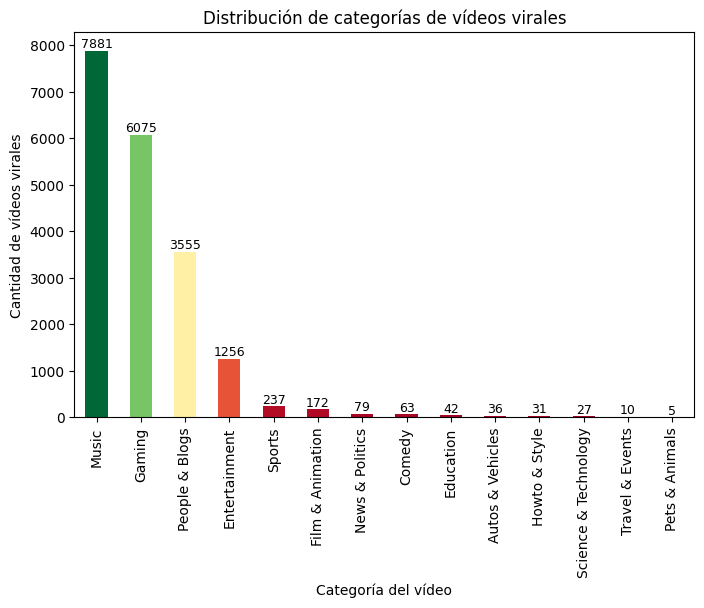

In [10]:
#An√°lisis de categor√≠as
categories = df['video_category_id'].value_counts()
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribuci√≥n de categor√≠as de v√≠deos virales")
plt.xlabel("Categor√≠a del v√≠deo")
plt.ylabel("Cantidad de v√≠deos virales")
plt.xticks(rotation=90)

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

In [11]:
#An√°lisis de duraci√≥n. Formato de la duraci√≥n: ISO 8601
#Transformar todas las duraciones a segundos.
df["video_duration_segs"] = df["video_duration"].apply(lambda x: int(isodate.parse_duration(x).total_seconds()))
df["video_duration_segs"].describe()

count    19479.000000
mean      2890.563684
std       6268.480493
min          6.000000
25%        202.000000
50%        468.000000
75%       1812.000000
max      73561.000000
Name: video_duration_segs, dtype: float64

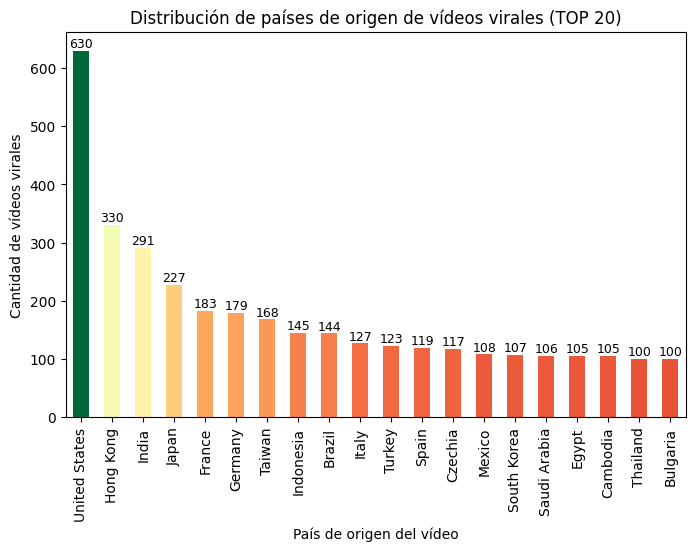

In [12]:
#Pa√≠s de origen de los v√≠deos
categories = df['channel_country'].value_counts()
categories = categories[0:20]
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribuci√≥n de pa√≠ses de origen de v√≠deos virales (TOP 20)")
plt.xlabel("Pa√≠s de origen del v√≠deo")
plt.ylabel("Cantidad de v√≠deos virales")
plt.xticks(rotation=90)

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

In [13]:
#An√°lisis de t√≠tulo (idioma, tama√±o, emojis)

In [14]:
#Ratio visitas-suscriptores

## Preprocesamiento t√≠tulos - an√°lisis de sentimientos

In [15]:
#funcion para extraer algunas caracter√≠sticas del t√≠tulo
def extract_features(df):
    df['title_length'] = df['video_title'].apply(lambda x: len(str(x)))
    df['title_word_count'] = df['video_title'].apply(lambda x: len(str(x).split()))
    df['title_has_exclamation'] = df['video_title'].apply(lambda x: '!' in str(x))
    df['title_has_question'] = df['video_title'].apply(lambda x: '?' in str(x))
    df['title_sentiment'] = df['video_title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['description_length'] = df['video_description'].apply(lambda x: len(str(x)))
    df['description_sentiment'] = df['video_description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    return df

In [41]:
df_preproc = df
df_preproc = extract_features(df_preproc)

# 2. Eliminar columnas irrelevantes y peligrosas para evitar fuga de datos
# Explicaci√≥n:
# Eliminamos identificadores, URLs, descripciones redundantes, el target y cualquier variable derivada del target.
# As√≠ evitamos fuga de datos y aseguramos que el modelo solo use informaci√≥n disponible antes de saber si un v√≠deo es viral.
# No eliminamos variables originales del v√≠deo/canal ni features extra√≠das del texto.

# Preprocesado para predicci√≥n antes de publicar
# Elimina TODAS las variables de interacci√≥n y m√©tricas post-publicaci√≥n
cols_to_drop = [
    'video_id', 'channel_id', 'video_default_thumbnail', 'thumbnail_url_hq',
    'channel_title', 'channel_description', 'channel_custom_url',
    'channel_localized_title', 'channel_localized_description', 'published_at',
    'is_viral', 'viral_score',  # targets
    'video_view_count', 'video_like_count', 'video_comment_count',
    'views_per_second', 'likes_per_view', 'likes_per_sub', 'views_per_sub','views_per_subscriber',
    'channel_view_count', 'channel_subscriber_count', 'channel_video_count'
]
cols_to_drop += ['video_tags', 'channel_country']
df_preproc_clf = df.copy()
df_preproc_clf = extract_features(df_preproc_clf)
df_preproc_clf.drop(columns=[col for col in cols_to_drop if col in df_preproc_clf.columns], inplace=True)

# Eliminar columnas con todos los valores NaN antes de imputar
cols_all_nan = [col for col in df_preproc_clf.columns if df_preproc_clf[col].isna().all()]
df_preproc_clf.drop(columns=cols_all_nan, inplace=True)

# Imputar nulos y codificar categ√≥ricas
num_cols = df_preproc_clf.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_preproc_clf.select_dtypes(include='object').columns
for col in cat_cols:
    df_preproc_clf[col] = df_preproc_clf[col].fillna('Unknown').astype(str)
    from sklearn.preprocessing import LabelEncoder
    df_preproc_clf[col] = LabelEncoder().fit_transform(df_preproc_clf[col])
for col in num_cols:
    df_preproc_clf[col] = df_preproc_clf[col].fillna(df_preproc_clf[col].median())

# Eliminar columnas constantes antes de escalar
from pandas.api.types import is_numeric_dtype
cols_constant = [col for col in df_preproc_clf.columns if is_numeric_dtype(df_preproc_clf[col]) and df_preproc_clf[col].nunique() <= 1]
df_preproc_clf.drop(columns=cols_constant, inplace=True)

# Estandarizar num√©ricas
from sklearn.preprocessing import StandardScaler
num_cols = df_preproc_clf.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_preproc_clf[num_cols] = scaler.fit_transform(df_preproc_clf[num_cols])

In [42]:
df_preproc

video_id    video_published_at video_trending__date  \
0      2ttVjSrLEZE  2024-10-02T15:00:27Z           2024.10.12   
1      cyCfVb0_FZg  2024-09-26T16:00:22Z           2024.10.12   
2      O2XDDmyuycw  2024-09-27T07:00:06Z           2024.10.12   
3      IoHXh4oGZM8  2024-09-22T08:08:44Z           2024.10.12   
4      nPBCrqxz30w  2024-09-17T16:00:45Z           2024.10.12   
...            ...                   ...                  ...   
19474  cKuvkKw8VKY  2025-09-01T23:00:42Z                  NaN   
19475  VmMsRy56jHw  2025-09-02T14:25:56Z                  NaN   
19476  _aH4svsCRh0  2025-09-02T04:30:33Z                  NaN   
19477  G3M3T3fEPZI  2025-09-01T15:47:22Z                  NaN   
19478  F1F7ufOwZxg  2025-09-02T00:03:13Z                  NaN   

       video_trending_country  \
0        United Arab Emirates   
1                    Bulgaria   
2                    Bulgaria   
3      Bosnia and Herzegovina   
4      Bosnia and Herzegovina   
...                       ...   
19474                     NaN   
19475                     NaN   
19476                     NaN   
19477                     NaN   
19478                     NaN   

                                             video_title  \
0      Ayed - Ma Hada Bali | Official Music Video 202...   
1      SHUNAKA - Mr.DaiMiPariteSi [OFFICIAL 4K VIDEO]...   
2                           Robi - –¢–∏—Ö–æ (Official Video)   
3                                     September 22, 2024   
4                               Ja sa 32  i 102  godineüòÇ   
...                                                  ...   
19474                       ·ü†·ü° ·ûú·ûÇ·üí·ûÇ·ûò·üÅ·ûÖ·ûò·üí·ûõ·üÇ·ûÄ·üó·üó·ûò·û∂·ûì·û†·üÅ·ûö·ûº....   
19475            üî¥LIVE |‚Äã Tyyy - RANK GAME 5MAN FLASH KH   
19476      ·ûü·ûª·üÜ·ûò·ûÄ·ûî·üÇ·ûî·ûä·üÉ·ûÇ·ûº·û¢·ûó·û∑·ûá·ûì·ûò·üí·ûä·ûÑ·ûò·ûæ·ûõ·üéüòåü§å || mobile legends   
19477  üî¥LIVE|YOO YOO Welcome Back With Seth Guy! Game...   
19478  üì£‚ÄºÔ∏è ·ûú·ûÇ·üí·ûÇ·ûî·üÜ·ûï·üí·ûõ·û∂·ûâ·ûñ·üÅ·ûá·üí·ûö·ûõ·üÅ·û∏·ûÄ·ûë·û∏2 ·ûá·û∂·ûò·ûΩ·ûô Event ·ûí·ûª·ûÑ·ûî·üâ·üÅ...   

                                       video_description  \
0      ŸÑŸÑÿ•ÿ¥ÿ™ÿ±ÿßŸÉ ŸÅŸä ÿßŸÑŸÇŸÜÿßÿ© | https://rb.gy/7wjde8\nŸÑŸÑÿß...   
1      Subscribe to Shunaka: https://bit.ly/3Mt8U6h\n...   
2      "–¢–∏—Ö–æ, —Ç–∏—Ö–æ, —Ç–∏—Ö–æ... –æ—Å—Ç–∞–≤–∞–º —Å —Ç–µ–±–µ"\n\n–ü—ä—Ä–≤–∞ ...   
3                                                    NaN   
4      Dobro do≈°li u ≈æivot jedne proseƒçne balkanske p...   
...                                                  ...   
19474  ·ûÖ·ûª·ûÖ·ûä·ûæ·ûò·üí·ûî·û∏·ûî·û∂·ûìQRü§û: https://pay.ababank.com/uBLeP...   
19475  Rank Game Full Squad Flash KH\n‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî\nABA: 0...   
19476                                                NaN   
19477  ----------------------------------------------...   
19478  üì£‚ÄºÔ∏è ·ûú·ûÇ·üí·ûÇ·ûî·üÜ·ûï·üí·ûõ·û∂·ûâ·ûñ·üÅ·ûá·üí·ûö·ûõ·üÅ·û∏·ûÄ·ûë·û∏2 ·ûá·û∂·ûò·ûΩ·ûô Event ·ûí·ûª·ûÑ·ûî·üâ·üÅ...   

                                 video_default_thumbnail video_category_id  \
0         https://i.ytimg.com/vi/2ttVjSrLEZE/default.jpg             Music   
1         https://i.ytimg.com/vi/cyCfVb0_FZg/default.jpg             Music   
2         https://i.ytimg.com/vi/O2XDDmyuycw/default.jpg             Music   
3         https://i.ytimg.com/vi/IoHXh4oGZM8/default.jpg     Entertainment   
4         https://i.ytimg.com/vi/nPBCrqxz30w/default.jpg    People & Blogs   
...                                                  ...               ...   
19474     https://i.ytimg.com/vi/cKuvkKw8VKY/default.jpg    People & Blogs   
19475  https://i.ytimg.com/vi/VmMsRy56jHw/default_liv...            Gaming   
19476     https://i.ytimg.com/vi/_aH4svsCRh0/default.jpg            Gaming   
19477  https://i.ytimg.com/vi/G3M3T3fEPZI/default_liv...            Gaming   
19478     https://i.ytimg.com/vi/F1F7ufOwZxg/default.jpg            Gaming   

                                              video_tags video_duration  ...  \
0      Ayed,Ayedh 

## Predicci√≥n de viralidad antes de publicar el v√≠deo

En este enfoque, el modelo solo utilizar√° informaci√≥n disponible antes de la publicaci√≥n (t√≠tulo, descripci√≥n, categor√≠a, duraci√≥n, horario, etc.) para predecir si un v√≠deo ser√° viral. Se eliminan todas las variables de interacci√≥n y m√©tricas que solo se conocen tras la publicaci√≥n.

In [43]:
# Definir X e y para clasificaci√≥n binaria (viral/no viral)

if 'is_viral' in df:
    y_clf = df['is_viral']
    
X_clf = df_preproc_clf.copy()

from sklearn.model_selection import train_test_split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

print('Shape X_train:', X_train_clf.shape)
print('Shape y_train:', y_train_clf.shape)
print('Proporci√≥n de clases en train:', y_train_clf.value_counts(normalize=True))

Shape X_train: (15583, 30)
Shape y_train: (15583,)
Proporci√≥n de clases en train: is_viral
1    0.682025
0    0.317975
Name: proportion, dtype: float64


In [44]:
# Entrenamiento y evaluaci√≥n de modelos de clasificaci√≥n
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Si no tienes xgboost instalado, descomenta la siguiente l√≠nea:
# !pip install xgboost
from xgboost import XGBClassifier

models_clf = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'),
    'MLPClassifier': MLPClassifier(random_state=42, max_iter=3000)
}

results_clf = {}
for name, model in models_clf.items():
    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    acc = accuracy_score(y_test_clf, y_pred)
    f1 = f1_score(y_test_clf, y_pred)
    roc = roc_auc_score(y_test_clf, model.predict_proba(X_test_clf)[:,1])
    results_clf[name] = {'Accuracy': acc, 'F1': f1, 'ROC-AUC': roc}
    print(f"\n{name}")
    print(classification_report(y_test_clf, y_pred))

import pandas as pd
results_clf_df = pd.DataFrame(results_clf).T
print("\nResumen de resultados:")
print(results_clf_df.sort_values('ROC-AUC', ascending=False))


LogisticRegression
              precision    recall  f1-score   support

           0       0.66      0.48      0.56      1239
           1       0.79      0.89      0.83      2657

    accuracy                           0.76      3896
   macro avg       0.72      0.68      0.70      3896
weighted avg       0.75      0.76      0.75      3896


RandomForest
              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1239
           1       0.86      0.93      0.89      2657

    accuracy                           0.84      3896
   macro avg       0.83      0.80      0.81      3896
weighted avg       0.84      0.84      0.84      3896



c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:39:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1239
           1       0.86      0.91      0.88      2657

    accuracy                           0.84      3896
   macro avg       0.82      0.80      0.81      3896
weighted avg       0.84      0.84      0.84      3896


MLPClassifier
              precision    recall  f1-score   support

           0       0.67      0.60      0.63      1239
           1       0.82      0.86      0.84      2657

    accuracy                           0.78      3896
   macro avg       0.74      0.73      0.74      3896
weighted avg       0.77      0.78      0.77      3896


Resumen de resultados:
                    Accuracy        F1   ROC-AUC
XGBoost             0.838296  0.884191  0.901853
RandomForest        0.843172  0.889572  0.900321
MLPClassifier       0.777464  0.840420  0.830938
LogisticRegression  0.757444  0.832891  0.798752


### Validaci√≥n cruzada, matriz de confusi√≥n y curvas de aprendizaje
A continuaci√≥n se implementan mejoras para validar la robustez del modelo:
- Validaci√≥n cruzada estratificada (StratifiedKFold) para obtener m√©tricas m√°s robustas.
- Visualizaci√≥n de la matriz de confusi√≥n para analizar errores.
- Curvas de aprendizaje para detectar overfitting/underfitting.

In [45]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

# Validaci√≥n cruzada estratificada para RandomForest y XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models_clf.items():
    if name in ['RandomForest', 'XGBoost']:
        print(f"\n{name} - Validaci√≥n cruzada (5 folds):")
        scores = cross_validate(model, X_clf, y_clf, cv=cv, scoring=['accuracy', 'f1', 'roc_auc'], n_jobs=-1)
        print(f"Accuracy: {scores['test_accuracy'].mean():.3f} ¬± {scores['test_accuracy'].std():.3f}")
        print(f"F1-score: {scores['test_f1'].mean():.3f} ¬± {scores['test_f1'].std():.3f}")
        print(f"ROC-AUC: {scores['test_roc_auc'].mean():.3f} ¬± {scores['test_roc_auc'].std():.3f}")


RandomForest - Validaci√≥n cruzada (5 folds):
Accuracy: 0.838 ¬± 0.003
F1-score: 0.885 ¬± 0.002
ROC-AUC: 0.898 ¬± 0.004

XGBoost - Validaci√≥n cruzada (5 folds):
Accuracy: 0.828 ¬± 0.007
F1-score: 0.876 ¬± 0.005
ROC-AUC: 0.893 ¬± 0.003


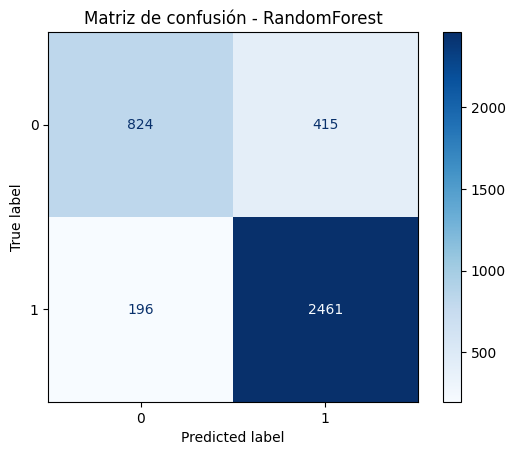

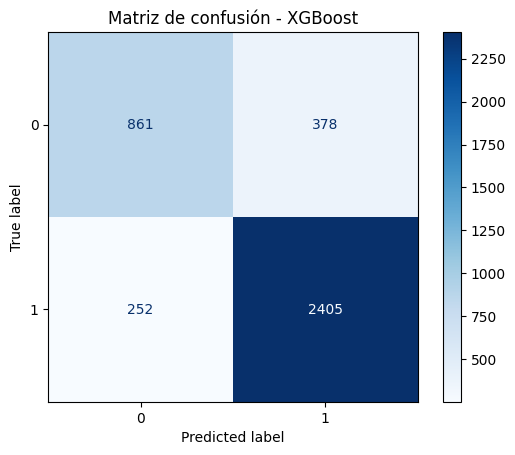

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in models_clf.items():
    if name in ['RandomForest', 'XGBoost']:
        y_pred = model.predict(X_test_clf)
        cm = confusion_matrix(y_test_clf, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Matriz de confusi√≥n - {name}")
        plt.show()

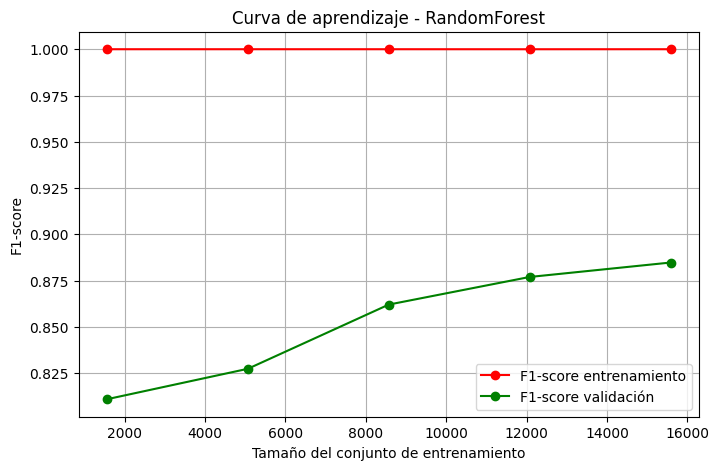

In [47]:
from sklearn.model_selection import learning_curve
import numpy as np

# Curva de aprendizaje para RandomForest
train_sizes, train_scores, test_scores = learning_curve(
    models_clf['RandomForest'], X_clf, y_clf, cv=cv, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='F1-score entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='F1-score validaci√≥n')
plt.title('Curva de aprendizaje - RandomForest')
plt.xlabel('Tama√±o del conjunto de entrenamiento')
plt.ylabel('F1-score')
plt.legend(loc='best')
plt.grid()
plt.show()

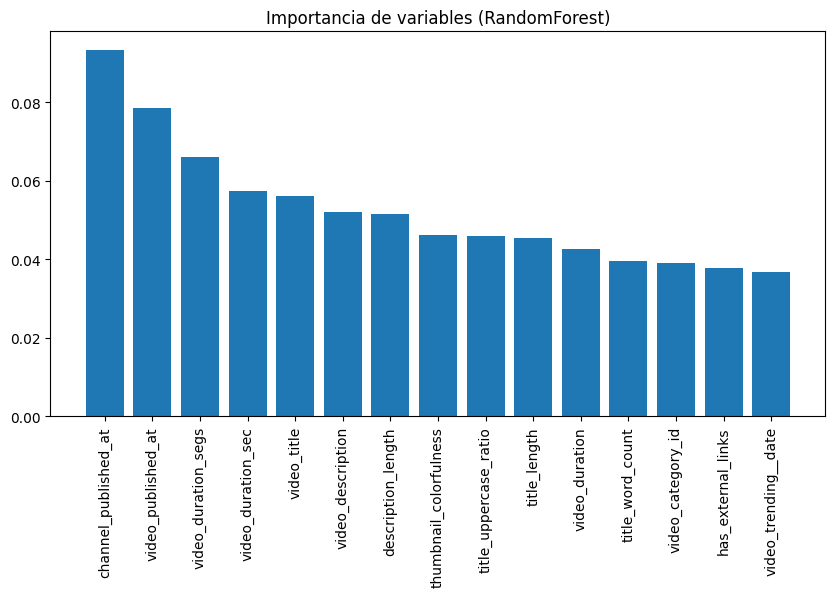

feature  importance
9     channel_published_at    0.093372
0       video_published_at    0.078451
29     video_duration_segs    0.066048
22      video_duration_sec    0.057482
3              video_title    0.056098
4        video_description    0.051956
18      description_length    0.051578
28  thumbnail_colorfulness    0.046287
17   title_uppercase_ratio    0.046041
11            title_length    0.045555
6           video_duration    0.042607
12        title_word_count    0.039451
5        video_category_id    0.039107
20      has_external_links    0.037799
1     video_trending__date    0.036815

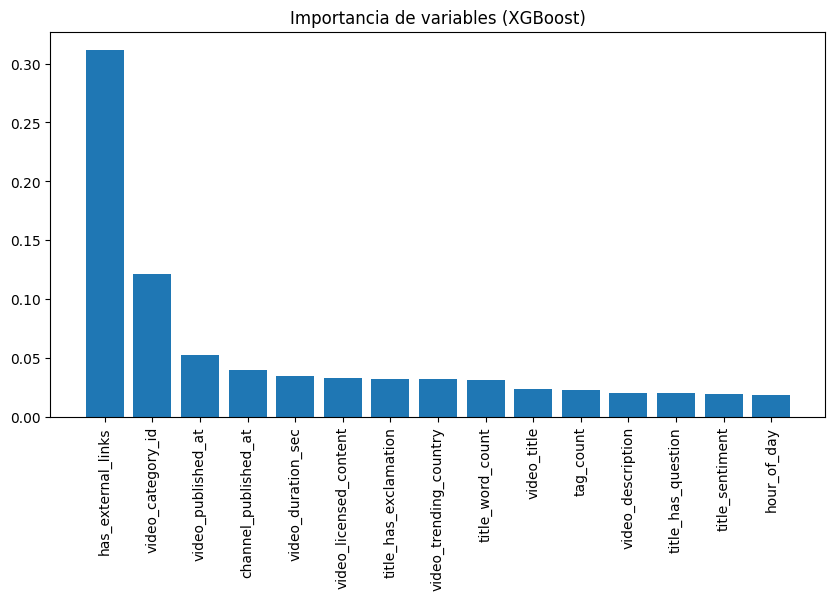

feature  importance
20      has_external_links    0.311761
5        video_category_id    0.121574
0       video_published_at    0.052706
9     channel_published_at    0.039157
22      video_duration_sec    0.034184
8   video_licensed_content    0.033090
13   title_has_exclamation    0.032306
2   video_trending_country    0.031758
12        title_word_count    0.030767
3              video_title    0.023625
21               tag_count    0.022930
4        video_description    0.020271
14      title_has_question    0.019652
15         title_sentiment    0.019402
23             hour_of_day    0.018254

In [48]:
# Importancia de variables para RandomForest y XGBoost
import matplotlib.pyplot as plt
import pandas as pd

for name, model in models_clf.items():
    if name in ['RandomForest', 'XGBoost']:
        importances = model.feature_importances_
        features = X_train_clf.columns
        imp_df = pd.DataFrame({'feature': features, 'importance': importances}).sort_values('importance', ascending=False)
        plt.figure(figsize=(10,5))
        plt.bar(imp_df['feature'][:15], imp_df['importance'][:15])
        plt.xticks(rotation=90)
        plt.title(f'Importancia de variables ({name})')
        plt.show()
        display(imp_df.head(15))

### Optimizaci√≥n y ajuste de modelos
En esta secci√≥n se implementan:
- B√∫squeda de hiperpar√°metros con GridSearchCV/RandomizedSearchCV.
- T√©cnicas de balanceo de clases (SMOTE y class_weight).
- Ajuste del umbral de decisi√≥n para maximizar la m√©trica F1.

In [49]:
# Balanceo de clases con SMOTE y ajuste de class_weight
from imblearn.over_sampling import SMOTE
from collections import Counter

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_clf, y_train_clf)
print('Distribuci√≥n de clases tras SMOTE:', Counter(y_train_bal))

# Actualizar modelos con class_weight='balanced' donde aplica
models_bal = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(y_train_bal)-sum(y_train_bal))/sum(y_train_bal)),
    'MLPClassifier': MLPClassifier(random_state=42, max_iter=3000)
}


Distribuci√≥n de clases tras SMOTE: Counter({0: 10628, 1: 10628})


In [50]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hiperpar√°metros para RandomForest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                              param_distributions=param_dist_rf, n_iter=10, scoring='f1', cv=3, n_jobs=-1, random_state=42)
rf_search.fit(X_train_bal, y_train_bal)
print('Mejores hiperpar√°metros RandomForest:', rf_search.best_params_)

# Hiperpar√°metros para XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0]
}
xgb_search = RandomizedSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(y_train_bal)-sum(y_train_bal))/sum(y_train_bal)),
                               param_distributions=param_dist_xgb, n_iter=10, scoring='f1', cv=3, n_jobs=-1, random_state=42)
xgb_search.fit(X_train_bal, y_train_bal)
print('Mejores hiperpar√°metros XGBoost:', xgb_search.best_params_)

Mejores hiperpar√°metros RandomForest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:40:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores hiperpar√°metros XGBoost: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2}


In [51]:
from sklearn.metrics import f1_score, precision_recall_curve

# Ajuste de umbral √≥ptimo para maximizar F1-score
for name, model in zip(['RandomForest', 'XGBoost'], [rf_search.best_estimator_, xgb_search.best_estimator_]):
    model.fit(X_train_bal, y_train_bal)
    y_proba = model.predict_proba(X_test_clf)[:,1]
    precisions, recalls, thresholds = precision_recall_curve(y_test_clf, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    print(f"\n{name} - Mejor umbral para F1: {best_threshold:.2f} (F1={f1_scores[best_idx]:.3f})")
    y_pred_opt = (y_proba >= best_threshold).astype(int)
    print(f"Reporte clasificaci√≥n con umbral √≥ptimo:\n", classification_report(y_test_clf, y_pred_opt))


RandomForest - Mejor umbral para F1: 0.43 (F1=0.887)
Reporte clasificaci√≥n con umbral √≥ptimo:
               precision    recall  f1-score   support

           0       0.81      0.64      0.72      1239
           1       0.85      0.93      0.89      2657

    accuracy                           0.84      3896
   macro avg       0.83      0.78      0.80      3896
weighted avg       0.84      0.84      0.83      3896



c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:41:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost - Mejor umbral para F1: 0.36 (F1=0.891)
Reporte clasificaci√≥n con umbral √≥ptimo:
               precision    recall  f1-score   support

           0       0.81      0.67      0.73      1239
           1       0.86      0.93      0.89      2657

    accuracy                           0.85      3896
   macro avg       0.83      0.80      0.81      3896
weighted avg       0.84      0.85      0.84      3896

